In [926]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [927]:
df_raw = pd.read_csv("household_power_consumption.csv", delimiter = ";")

/var/folders/j0/jgjbps_j6qq5jlvb67nw6d3w0000gn/T/ipykernel_14599/1950502375.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.csv", delimiter = ";")


In [928]:
df_raw.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [929]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [930]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [931]:
df = df_raw.copy()

In [932]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [933]:
cols=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']
df[cols]= df[cols].apply(pd.to_numeric, errors='coerce')
df[cols].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
0,4.216,0.418,234.84,18.4,0.0,1.0
1,5.360,0.436,233.63,23.0,0.0,1.0
2,5.374,0.498,233.29,23.0,0.0,2.0
3,5.388,0.502,233.74,23.0,0.0,1.0
4,3.666,0.528,235.68,15.8,0.0,1.0


In [934]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [935]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [936]:
df.Date[0]

datetime.date(2006, 12, 16)

In [937]:
df.Time[0]


datetime.time(17, 24)

In [938]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


<AxesSubplot:>

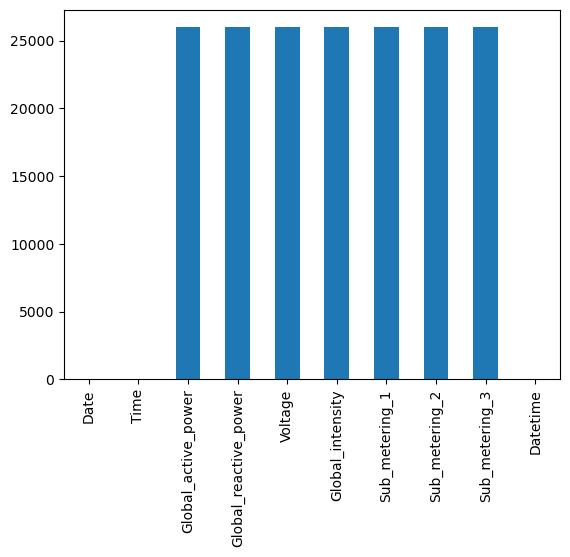

In [939]:
df.isna().sum().plot.bar()

<AxesSubplot:xlabel='Date'>

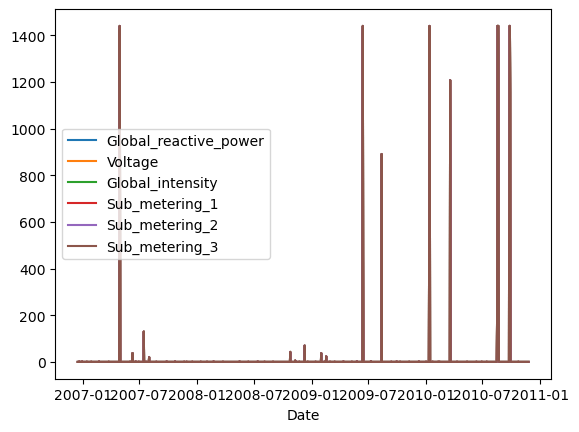

In [940]:
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1])

In [941]:
df = df.dropna()

In [942]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-02 00:59:44.397740544
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-10 05:37:45
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-11-30 01:22:30
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-11-23 20:31:15
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


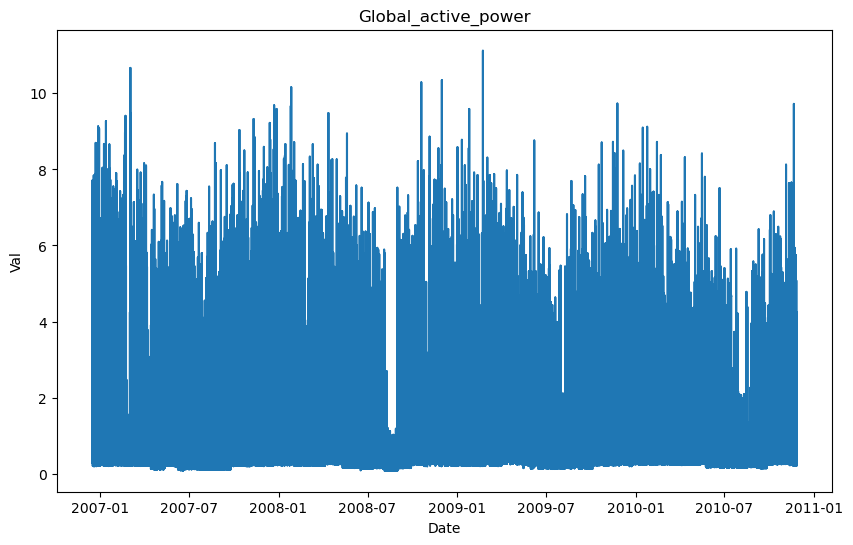

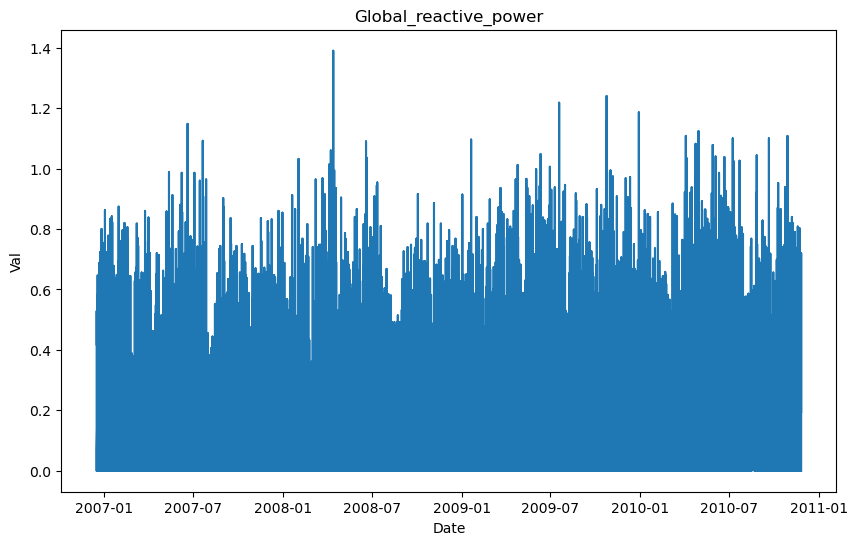

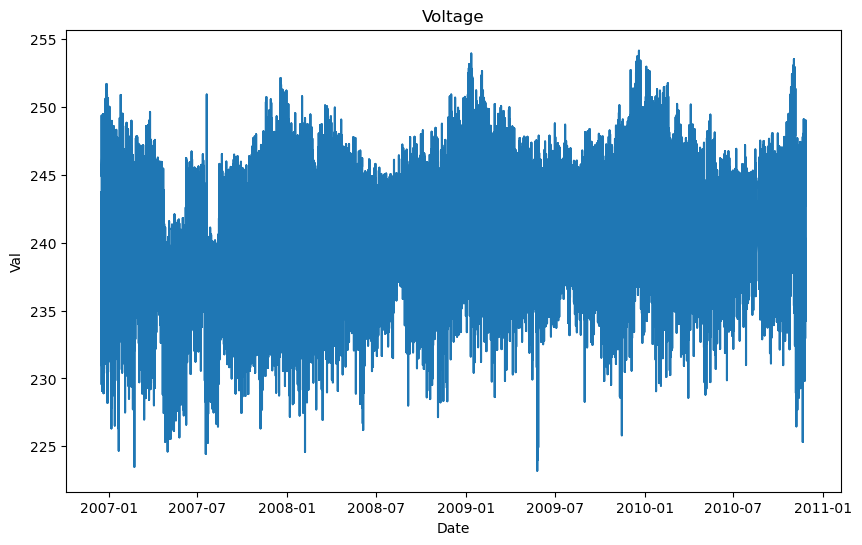

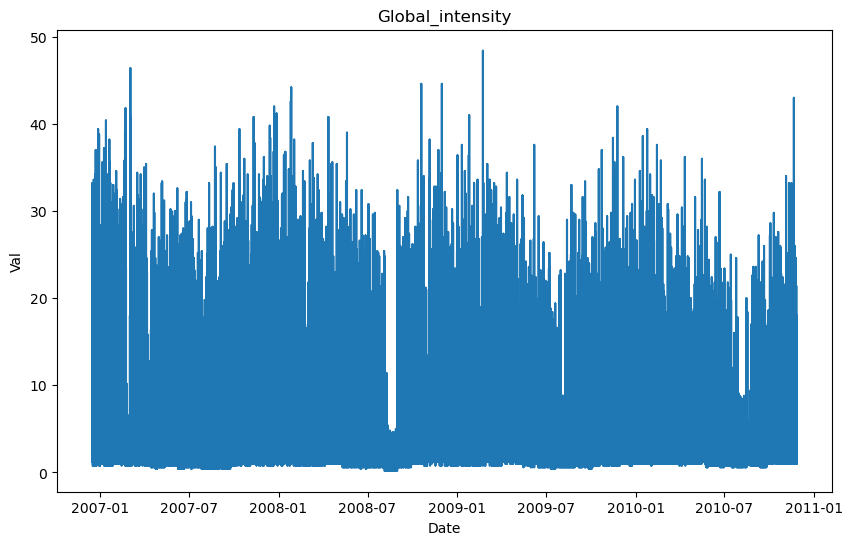

In [943]:
df['Date']=pd.to_datetime(df['Date'])

vars=['Global_active_power','Global_reactive_power','Voltage','Global_intensity']

for var in vars:
    plt.figure(figsize=(10,6))
    plt.plot(df['Date'],df[var])
    plt.title(var)
    plt.xlabel('Date')
    plt.ylabel('Val')
    plt.show()

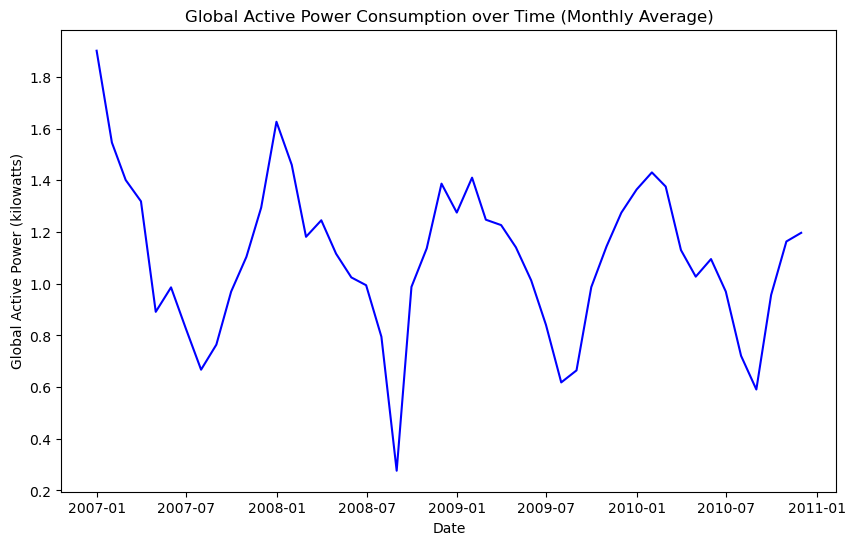

In [945]:
# Resample to monthly frequency and calculate the mean
df_monthly = df.resample('M', on='Datetime').mean()

# Plot the resampled data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_monthly.index, df_monthly['Global_active_power'], color='blue')

# Set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Global Active Power (kilowatts)')
ax.set_title('Global Active Power Consumption over Time (Monthly Average)')

plt.show()


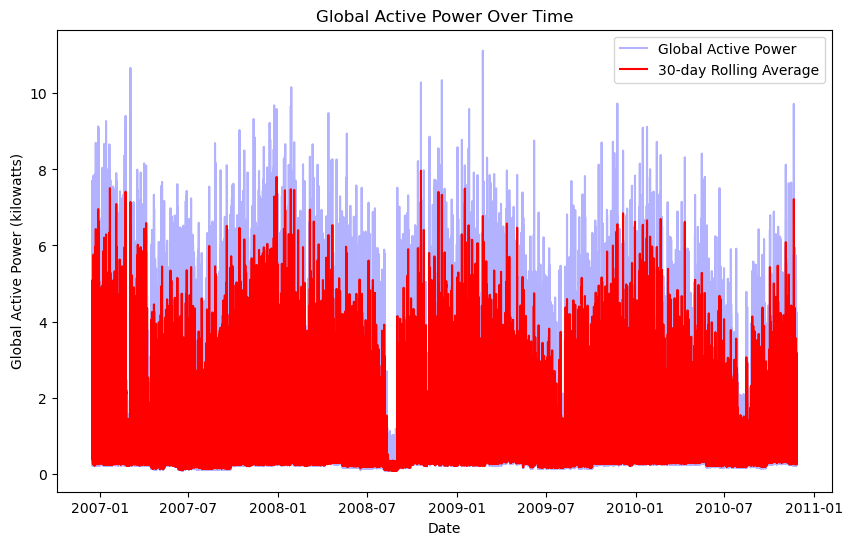

In [946]:

df_na = df.dropna(subset=['Global_active_power'])
rolling_avg = df_na['Global_active_power'].rolling(window=30, min_periods=1).mean()

df_na['Global_active_power'] = pd.to_numeric(df_na['Global_active_power'], errors='coerce')
ax.plot(df_na['Datetime'], df_na['Global_active_power'], color='blue', alpha=0.3, label='Global Active Power')

# Plot the data on a line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_na['Datetime'], df_na['Global_active_power'], color='blue', alpha=0.3, label='Global Active Power')
ax.plot(df_na['Datetime'], rolling_avg, color='red', label='30-day Rolling Average')

# Set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Global Active Power (kilowatts)')
ax.set_title('Global Active Power Over Time')
ax.legend()

plt.show()


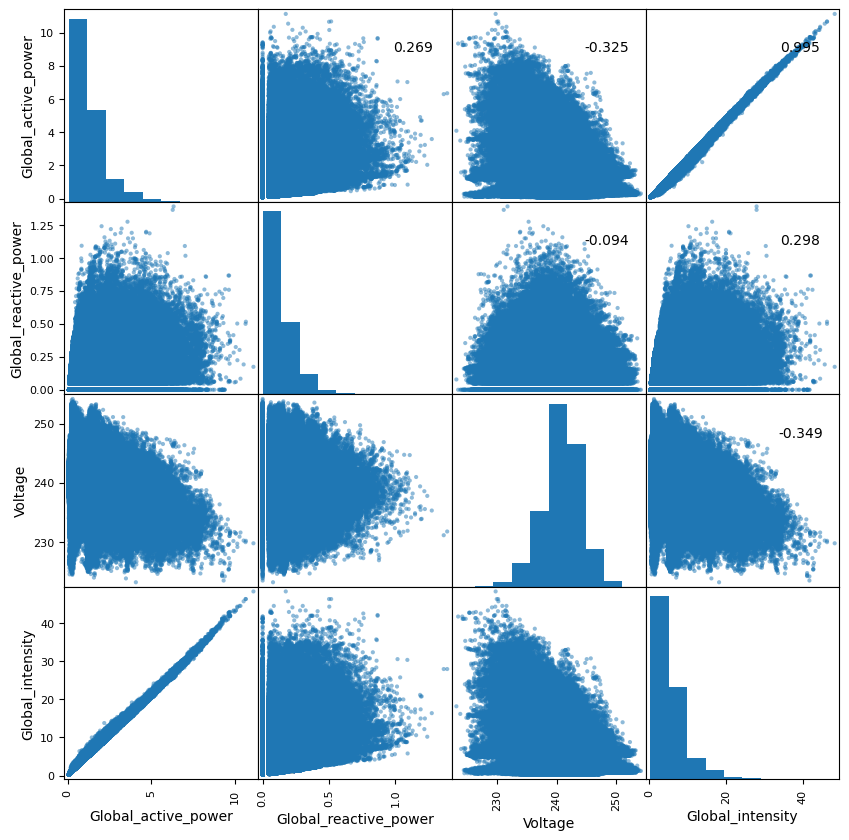

In [948]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()